<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/WordCloud%E3%82%92%E4%BD%9C%E6%88%90%E3%81%99%E3%82%8B%EF%BC%88%E8%BF%91%E4%BB%A3%E6%97%A5%E6%9C%AC%E8%AA%9E%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WordCloud を作成する（近代日本語）

*  [wordcloud](https://github.com/amueller/word_cloud)
   *  最新版は v1.9.3 (2023-12-09)

Word cloud object for generating and drawing.

    Parameters
    ----------
    font_path : string



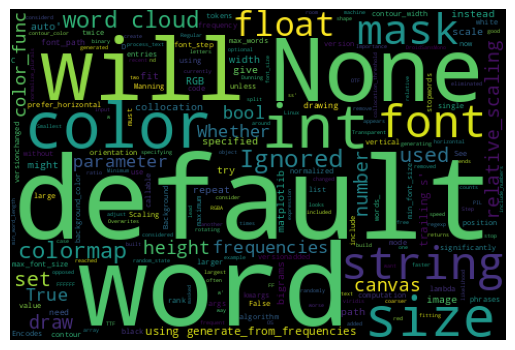

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud モジュールの説明文（docstring）を取得する
text = WordCloud.__doc__

# 最初の100文字を表示する
print(text[:100])

# word cloud 作成のための準備をおこなう（サイズを指定する）
wc = WordCloud(width=480, height=320)

# word cloud を作成する
wc.generate(text)

# 作成した図を表示する
plt.imshow(wc)
plt.axis('off')
plt.show()

## 日本語テキストをそのまま試す

*  『吾輩は猫である』の文章 [neko.txt](https://nlp100.github.io/data/neko.txt)（テキストデータは「言語処理100本ノック」による）

In [2]:
# 指定した URL のテキストをダウンロードする
!curl -sRLO https://nlp100.github.io/data/neko.txt

'一\n\n\u3000吾輩は猫である。\n名前はまだ無い。\n\n\u3000どこで生れたかとんと見当がつかぬ。\n何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。\n吾輩はここで始めて人間というものを見た。\n'

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。



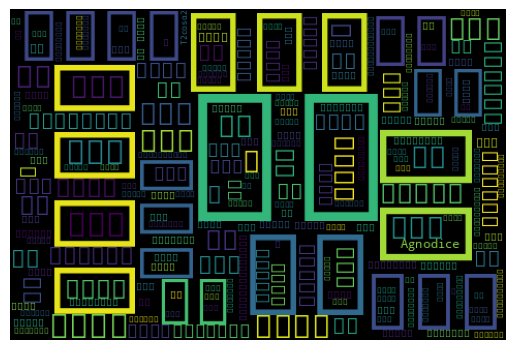

In [3]:
# 指定したテキストファイルの内容を読み込む。
text = open('neko.txt', encoding='utf_8').read()

# 最初の100文字を表示する
display(text[:100])
print(text[:100])

# word cloud を作成する
wc = WordCloud(width=480, height=320)
wc.generate(text)

# 作成した図を表示する
plt.imshow(wc)
plt.axis('off')
plt.show()

*  matplotlib や WordCloud 等のパッケージは日本語に対応しておらず文字がすべて四角形（いわゆる豆腐）になってしまう。

## 日本語フォントをインストールして利用する

*  フォントのインストール方法は，環境（OS など）ごとに大きく異なる。
   *  ここでは細かいことを考えず，ある程度の日本語が使えればよい，ということにする。
   *  たとえば matplotlib（Pythonで図を扱う際の主要なライブラリ）で日本語を利用するためのパッケージである [matplotlib-fontja](https://github.com/ciffelia/matplotlib-fontja) は，OS を気にせずに日本語フォント [IPAexゴシック (Ver.004.01)](https://moji.or.jp/ipafont/) を利用できるように工夫されている。今回は，これを利用する。

In [4]:
!pip install matplotlib-fontja

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.3 MB/s eta 0:00:00


In [5]:
from matplotlib_fontja import get_font_ttf_path

# 日本語フォントのパス
get_font_ttf_path()

'/usr/local/lib/python3.10/dist-packages/matplotlib_fontja/fonts/ipaexg.ttf'

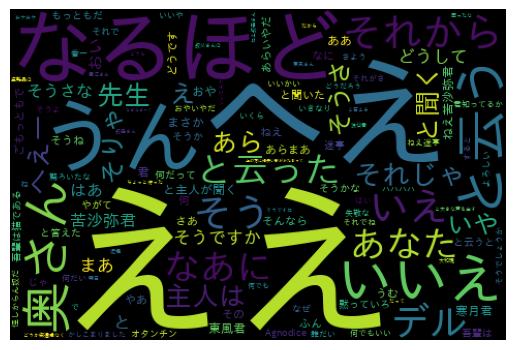

In [6]:
# もう一度 word cloud を作成する
wc = WordCloud(width=480, height=320, font_path=get_font_ttf_path())
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

* 「ええ」「へえ」「そう」など，重要な意味を持たないと思われる単語が多くみられる。
  * 分析の目的によってはこのような単語を重視する場合もある。

## ストップワードを設定する

*  英語テキストでは「a」「the」などがいかにも頻出しそうだが，最初に英語テキストの word cloud を作成したときには，そのような単語が見当たらなかった。これは，既定のストップワード（無視すべき単語群）が指定されていたからである。
   *  wordcloud パッケージにおけるデフォルトのストップワード: https://github.com/amueller/word_cloud/blob/main/wordcloud/stopwords
*  日本語でも，ストップワードを指定してみよう。

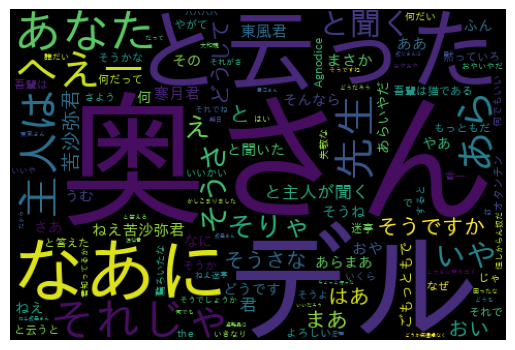

In [7]:
stopwords = ['ええ', 'へえ', 'なるほど', 'うん', 'いいえ', 'と云う', 'それから', 'いえ', 'そう']

# もう一度 word cloud を作成する
wc = WordCloud(width=480, height=320, font_path=get_font_ttf_path(), stopwords=stopwords)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

*  『吾輩は猫である』を読んだことがあれば，その特徴語が「奥さん」や「デル」である，というのはかなり意外な結果だと感じるはずである（先に言っておくと，実は，この word cloud は誤りである）。
*  実際，「奥さん」よりも「猫」の方が出現回数がずっと多い。
*  さきほどストップワードに指定した語句の出現回数の順位を調べてみても，word cloud の結果と矛盾する点が多い。

In [8]:
# いくつかの単語の出現回数を調べる
words = ['ええ', 'へえ', 'なるほど', 'うん', 'いいえ', 'と云う', 'それから', 'いえ', 'そう', '奥さん', 'デル', 'と云った', '猫']
for word in words:
  print(word, text.count(word))

ええ 111
へえ 54
なるほど 92
うん 90
いいえ 24
と云う 652
それから 99
いえ 82
そう 622
奥さん 56
デル 13
と云った 71
猫 261


*  では，この分析のどこに問題があったのだろうか。
*  結論からいえば，形態素解析の有無である。

## 『吾輩は猫である』の冒頭のみで word cloud を作成する

'一\n\n\n\n\u3000吾輩は猫である。\n\n名前はまだ無い。\n\n\n\n\u3000どこで生れたかとんと見当がつかぬ。\n\n何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。\n\n吾輩はここで始めて人間というものを見た。\n\nしかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。\n\nこの書生というのは時々我々を捕えて煮て食うという話である。\n\nしかしその当時は何という考もなかったから別段恐しいとも思わなかった。\n\nただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。\n\n掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。\n\nこの時妙なものだと思った感じが今でも残っている。\n\n第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。\n\nその後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。\n\nのみならず顔の真中があまりに突起している。\n\nそうしてその穴の中から時々ぷうぷうと煙を吹く。\n\nどうも咽せぽくて実に弱った。\n\nこれが人間の飲む煙草というものである事はようやくこの頃知った。\n\n\n\n\u3000この書生の掌の裏でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始めた。\n\n書生が動くのか自分だけが動くのか分らないが無暗に眼が廻る。\n\n胸が悪くなる。\n\n到底助からないと思っていると、どさりと音がして眼から火が出た。\n\nそれまでは記憶しているがあとは何の事やらいくら考え出そうとしても分らない。\n\n\n\n\u3000ふと気が付いて見ると書生はいない。\n\nたくさんおった兄弟が一疋も見えぬ。\n\n肝心の母親さえ姿を隠してしまった。\n'

一



　吾輩は猫である。

名前はまだ無い。



　どこで生れたかとんと見当がつかぬ。

何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。

吾輩はここで始めて人間というものを見た。

しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。

この書生というのは時々我々を捕えて煮て食うという話である。

しかしその当時は何という考もなかったから別段恐しいとも思わなかった。

ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。

掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。

この時妙なものだと思った感じが今でも残っている。

第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。

その後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。

のみならず顔の真中があまりに突起している。

そうしてその穴の中から時々ぷうぷうと煙を吹く。

どうも咽せぽくて実に弱った。

これが人間の飲む煙草というものである事はようやくこの頃知った。



　この書生の掌の裏でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始めた。

書生が動くのか自分だけが動くのか分らないが無暗に眼が廻る。

胸が悪くなる。

到底助からないと思っていると、どさりと音がして眼から火が出た。

それまでは記憶しているがあとは何の事やらいくら考え出そうとしても分らない。



　ふと気が付いて見ると書生はいない。

たくさんおった兄弟が一疋も見えぬ。

肝心の母親さえ姿を隠してしまった。



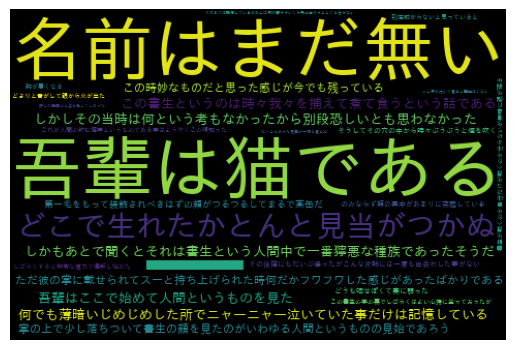

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path

# 指定したテキストファイルの最初の30行だけを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  lines = [file.readline() for _ in range(30)]
text = '\n'.join(lines)

# テキストの内容を表示する
display(text)
print(text)

# もう一度 word cloud を作成する
wc = WordCloud(width=480, height=320, font_path=get_font_ttf_path())
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

*  冒頭のみで word cloud を作成してみると，本来は単語ごとに処理すべきところが，より長い文などの塊ごとに処理されていることがよく分かる。
  *  ちなみに，さきほどの全文を用いた結果も，よく観察すると，「と主人が聞く」など単語でなくより長い単位で処理されていることが分かる。
  *  なぜ全文を用いた結果でそれらしい結果が見られたかと言えば，偶然としか言いようがない。Python の wordcloud パッケージではデフォルトで出現回数が上位200位までの「単語」を利用することになっている。また，「単語」を取得する際には記号を除去することになっており，記号は単語の区切りとして扱われる。意味のある長い文と比較して，短い発話文や感嘆詞は繰り返し出現する可能性が高い。これらの性質から「へえ」「いいえ」などが多く検出される結果が得られた，と考えられる。

## 日本語の形態素解析をおこなう

*  形態素解析器で有名なものはいくつかあるが，ここでは手軽に利用可能かつ高速な [fugashi](https://github.com/polm/fugashi) を用いる。
   *  fugashi は高速な日本語形態素解析器として有名で長く利用されている [MeCab](https://taku910.github.io/mecab/) をベースに開発された（[McCann 2020](https://doi.org/10.48550/arXiv.2010.06858)）。
   *  [unidic-py](https://github.com/polm/unidic-py) を通じて UniDic 辞書を利用することができる。
   *  辞書は軽量版 unidic-lite を利用することも多いが，ここではフル版を利用する。

In [10]:
# fugashi をインストールする
!pip install 'fugashi[unidic]'
!python -m unidic download

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 13.6 MB/s eta 0:00:00
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7402 sha256=cc03621870fa1df444654bfa9d7478f1cf5bff4dd9967ed424e7b821b42c39d6
  Stored in directory: /root/.cache/pip/wheels/7a/72/72/1f3d654c345ea69d5d51b531c90daf7ba14cc555eaf2c64ab0
Successfully built unidic
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:19<00:00, 26.4MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.10/dist-packages/unidic/dicdir


*  実際に，形態素解析を利用して日本語の「わかち書き」をおこなってみよう。

In [11]:
from fugashi import Tagger

# 形態素解析器を準備する
tagger = Tagger('-Owakati')

# 形態素解析器を実施する
text = '吾輩は猫である。名前はまだ無い。'
tagger.parse(text)

'吾輩 は 猫 で ある 。 名前 は まだ 無い 。'

*  少し分かりにくいかもしれないが，単語（実際には形態素）ごとに空白文字で区切られている。
*  このことによって，（英語など空白区切りの言語と同様に）単語ベースの解析が可能となる。

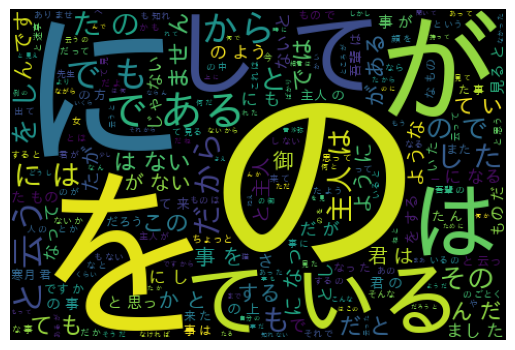

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path
from fugashi import Tagger

# 『吾輩は猫である』のテキストファイルを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  text = file.read()

# 形態素解析によるわかち書きをおこなう
tagger = Tagger('-Owakati')
text = tagger.parse(text)

# もう一度 word cloud を作成する
wc = WordCloud(width=480, height=320, font_path=get_font_ttf_path())
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

*  よく見ると，「で ある」「て いる」「と 云う」のように，空白区切りの二語が出現している。
*  これは，WordCloud が規定で bigram を検出するようになっているからである。
   *  おそらく英語の慣用句（turn on など）を検出するためではないか，と思う。
*  今は bigram には興味がないので， `collocations=False` を指定することによって bigram を検出しないようにする。

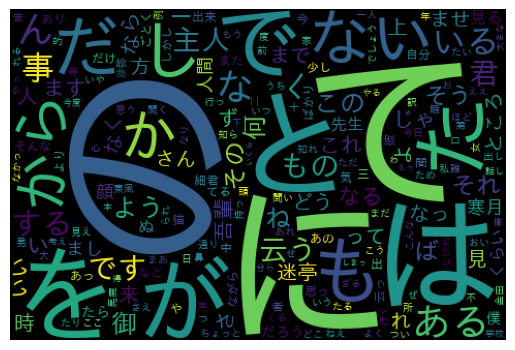

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path
from fugashi import Tagger

# 『吾輩は猫である』のテキストファイルを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  text = file.read()

# 形態素解析によるわかち書きをおこなう
tagger = Tagger('-Owakati')
text = tagger.parse(text)

# もう一度 word cloud を作成する
wc = WordCloud(width=480, height=320, font_path=get_font_ttf_path(), collocations=False)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

*  ひらがな1文字の「単語」は重要ではなさそうであるから，除外したい。
*  1文字のひらがなを要素とする list を作成するには，たとえば以下のようにすればよい。

In [14]:
list('あいうえおかきくけこ')

['あ', 'い', 'う', 'え', 'お', 'か', 'き', 'く', 'け', 'こ']

*  この方法だと「ん」まで五十音すべての文字を入力するのは大変である。
*  AI（ChatGPT 等）にお願いして作ってもらってもいいが，漏れがないか確認するのも手間である。
*  計算機の内部では，文字は「文字コード」とよばれる数値として扱われる。このことを利用すると，以下のようにしてひらがなのリストを作成することができる。
   * 小文字も含まれるが，ストップワードとして指定するには申し分ない。

In [15]:
hiragana_list = [chr(code) for code in range(0x3041, 0x3097)]
print(hiragana_list)

['ぁ', 'あ', 'ぃ', 'い', 'ぅ', 'う', 'ぇ', 'え', 'ぉ', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'っ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'ゃ', 'や', 'ゅ', 'ゆ', 'ょ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'ゎ', 'わ', 'ゐ', 'ゑ', 'を', 'ん', 'ゔ', 'ゕ', 'ゖ']


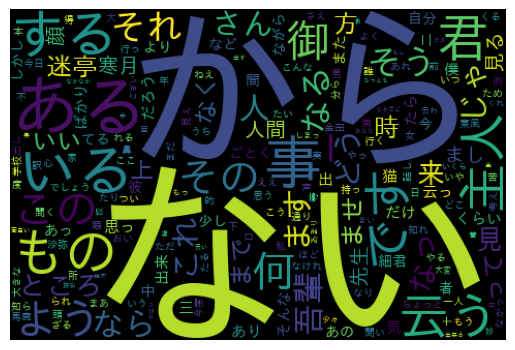

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path
from fugashi import Tagger

# 『吾輩は猫である』のテキストファイルを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  text = file.read()

# 形態素解析によるわかち書きをおこなう
tagger = Tagger('-Owakati')
text = tagger.parse(text)

# ストップワードを用意する
hiragana_list = [chr(code) for code in range(0x3041, 0x3097)]
stopwords = hiragana_list

# もう一度 word cloud を作成する
wc = WordCloud(
    width=480, height=320,
    font_path=get_font_ttf_path(),
    collocations=False,
    stopwords=stopwords,
)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

*  さらにストップワードを追加する。

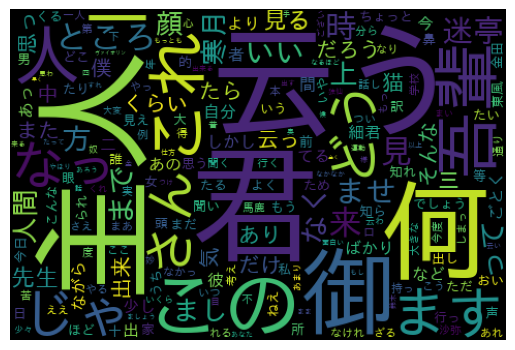

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path
from fugashi import Tagger

# 『吾輩は猫である』のテキストファイルを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  text = file.read()

# 形態素解析によるわかち書きをおこなう
tagger = Tagger('-Owakati')
text = tagger.parse(text)

# ストップワードを用意する
hiragana_list = [chr(code) for code in range(0x3041, 0x3097)]
stopwords = hiragana_list + 'ない から ある いる 事 する もの です よう その それ そう なる なら'.split()

# もう一度 word cloud を作成する
wc = WordCloud(
    width=480, height=320,
    font_path=get_font_ttf_path(),
    collocations=False,
    stopwords=stopwords,
)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

*  よく利用される日本語のストップワードは，既に誰かが用意してくれているものを使うのもの良い。
   *  かなり古いが有名なものとして，SlothLib のストップワードがある。
   *  文献: [大島・中村・田中 2007](https://cir.nii.ac.jp/crid/1520290884780525184)
   *  SourceForge というサイト（まだ GitHub が無かったころにオープンソースリポジトリとして良く利用されていた）で今も公開されているが，接続が安定せず，ダウンロードに時間がかかることも多い。

In [18]:
# SlothLib の日本語ストップワードをダウンロードする
# ※SourceForge は不安定なので GitHub gist にコピーを置いてある
#!curl -sRL http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt -o slothlib_stopwords.txt
!curl -sRL https://gist.githubusercontent.com/dfukagaw28/10151410c39581e25569588c6b1ed598/raw/5f7e2589e04d9f2c251cfa1d58077f29f0625888/slothlib_stopwords.txt -o slothlib_stopwords.txt

In [19]:
# SlothLib の日本語ストップワードの内容を確認する（最初の10行）
!head slothlib_stopwords.txt

あそこ
あたり
あちら
あっち
あと
あな
あなた
あれ
いくつ
いつ


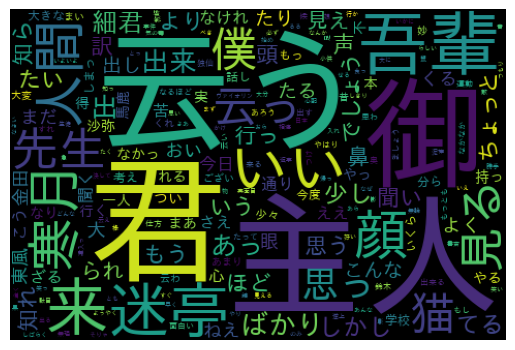

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path
from fugashi import Tagger

# 『吾輩は猫である』のテキストファイルを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  text = file.read()

# 形態素解析によるわかち書きをおこなう
tagger = Tagger('-Owakati')
text = tagger.parse(text)

# ストップワードを用意する
hiragana_list = [chr(code) for code in range(0x3041, 0x3097)]
slothlib_stopwords = open('slothlib_stopwords.txt', encoding='utf_8').read().split()
stopwords = hiragana_list + slothlib_stopwords
stopwords += 'ない から ある いる 事 する もの です よう その それ そう なる なら この なっ どう まで ます ませ なく じゃ ただ ながら たら そんな くらい だろう って だけ あり ごとく また あの'.split()

# もう一度 word cloud を作成する
wc = WordCloud(
    width=480, height=320,
    font_path=get_font_ttf_path(),
    collocations=False,
    stopwords=stopwords,
)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

*  よく見ると，「云う」と「云っ」のように動詞の活用語尾だけが異なるものが分かれて登場している。
*  これも分析の目的次第ではあるが，あることばが文章内でどのように表現されているか（表層形）に注目するのではなく，あくまでどのようなことば（たとえばどのような動詞）が使われているかに注目する場合，「云う」「云った」のような違いは無視してひとつにまとめて集計すべきである，と考えられる。
*  形態素解析は，単に「分かち書き」をしてくれるだけでなく，形態素に関するさまざまな情報を提供してくれる。その情報を利用するとより深い分析が可能である。

## 形態素に関するさまざまな情報を活用する

*  MeCab や fugashi を用いて形態素解析をおこなうことによって，さまざまな情報を取得することができる。

In [21]:
from fugashi import Tagger

# 形態素解析器を準備する
tagger = Tagger()

# 形態素解析器を実施する
text = '吾輩は猫である。名前はまだ無い。'
result = tagger.parse(text)
print(result)

吾輩	代名詞,,,,,,ワガハイ,我が輩,吾輩,ワガハイ,吾輩,ワガハイ,混,"","","","","","",体,ワガハイ,ワガハイ,ワガハイ,ワガハイ,"0","","",11321954766299648,41189
は	助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,"","","","","","",係助,ハ,ハ,ハ,ハ,"","動詞%F2@0,名詞%F1,形容詞%F2@-1","",8059703733133824,29321
猫	名詞,普通名詞,一般,,,,ネコ,猫,猫,ネコ,猫,ネコ,和,"","","","","","",体,ネコ,ネコ,ネコ,ネコ,"1","C4","",7918141678166528,28806
で	助動詞,,,,助動詞-ダ,連用形-一般,ダ,だ,で,デ,だ,ダ,和,"","","","","","",助動,デ,ダ,デ,ダ,"","名詞%F1","",6299110739157633,22916
ある	動詞,非自立可能,,,五段-ラ行,終止形-一般,アル,有る,ある,アル,ある,アル,和,"","","","","","",用,アル,アル,アル,アル,"1","C3","",334260158472875,1216
。	補助記号,句点,,,,,,。,。,,。,,記号,"","","","","","",補助,,,,,"","","",6880571302400,25
名前	名詞,普通名詞,一般,,,,ナマエ,名前,名前,ナマエ,名前,ナマエ,和,"","","","","","",体,ナマエ,ナマエ,ナマエ,ナマエ,"0","C2","",7684770268062208,27957
は	助詞,係助詞,,,,,ハ,は,は,ワ,は,ワ,和,"","","","","","",係助,ハ,ハ,ハ,ハ,"","動詞%F2@0,名詞%F1,形容詞%F2@-1","",8059703733133824,29321
まだ	副詞,,,,,,マダ,未だ,まだ,マダ,まだ,マダ,和,"","","","","","",相,マダ,マダ,マダ,マダ,"1","","",9825527997276672,35745
無い	形容詞,非自立可能,,,形容詞,終止形-一般,ナイ,無い,無い,ナイ,無い,ナイ,和,"","","","","","",相,ナ

*  語ごとの情報を利用したいときは， `tagger.parse(text)` でなく `tagger(text)` を利用するとよい。

In [22]:
from fugashi import Tagger

# 形態素解析器を準備する
tagger = Tagger()

# 形態素解析器を実施する
text = '吾輩は猫である。名前はまだ無い。'

# 形態素ごとに処理をおこなう
for word in tagger(text):
  # 形態素の情報を表示する
  print(word.surface, word.feature.pos1, word.feature.lemma)

吾輩 代名詞 我が輩
は 助詞 は
猫 名詞 猫
で 助動詞 だ
ある 動詞 有る
。 補助記号 。
名前 名詞 名前
は 助詞 は
まだ 副詞 未だ
無い 形容詞 無い
。 補助記号 。


*  ここでは `pos1`（品詞大分類） と `lemma`（語彙素）の情報を利用した。
   *  他にどのような情報を取得できるか，については，たとえば以下を参照してほしい。
      * [polm/unidic-py: Unidic packaged for installation via pip.](https://github.com/polm/unidic-py/tree/master?tab=readme-ov-file#fields) unidic-py の README（英語）
      *  [「UniDic」国語研短単位自動解析用辞書|FAQ](https://clrd.ninjal.ac.jp/unidic/faq.html) 国立国語研究所が提供する UniDic の FAQ ページ
      *  [出力フォーマット -- MeCab: Yet Another Japanese Dependency Structure Analyzer](https://taku910.github.io/mecab/format.html)

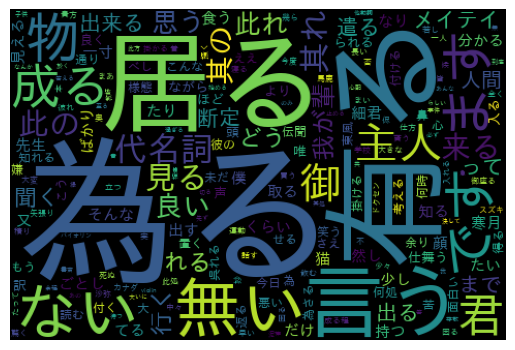

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path
from fugashi import Tagger

# 『吾輩は猫である』のテキストファイルを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  text = file.read()

# 形態素解析によってテキストを語彙素の列に変換する。
words = []
tagger = Tagger()
for word in tagger(text):
  # lemma を抽出する
  lemma = word.feature.lemma

  # lemma が存在しない場合（名詞など）は表層形を用いる
  if lemma is None:
    lemma = word.surface

  words.append(lemma)
text = ' '.join(words)

# ストップワードを用意する
hiragana_list = [chr(code) for code in range(0x3041, 0x3097)]
slothlib_stopwords = open('slothlib_stopwords.txt', encoding='utf_8').read().split()
stopwords = hiragana_list + slothlib_stopwords
#stopwords += 'ない から ある いる 事 する もの です よう その それ そう なる なら この なっ どう まで ます ませ なく じゃ ただ ながら たら そんな くらい だろう って だけ あり ごとく また あの'.split()

# もう一度 word cloud を作成する
wc = WordCloud(
    width=480, height=320,
    font_path=get_font_ttf_path(),
    collocations=False,
    stopwords=stopwords,
)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## 形態素解析で用いる辞書について

*  ここでおこなった形態素解析は， [Web茶まめ](https://chamame.ninjal.ac.jp/) を用いてブラウザで手軽に実行することができる。
   *  Web茶まめは，国立国語研究所が公開している Web サービスである。
   *  Web茶まめの特徴のひとつとして，複数の UniDic 辞書を利用して形態素解析を実施し，その結果を比較するという機能がある。
   *  試しに『吾輩は猫である』をさまざまな辞書で形態素解析してみると，いろいろな発見がある。
      *  現代語 vs 現代語話し言葉 ⇒ 現代語の方が better？
      *  現代語 vs 近現代口語小説 ⇒ 近現代口語小説の方が better？
      *  近現代口語小説 vs 旧仮名口語 ⇒ 近現代口語小説の方が better？
      *  近現代口語小説 vs 近代文語 ⇒ 近現代口語小説の方が better？
   *  ざっと見た感じでは，『吾輩は猫である』を解析するための辞書として「近現代口語小説」が最も有力な候補だと考えられる。
      *  これも実は注意が必要である。[青空文庫](https://www.aozora.gr.jp/index.html)において公開されている夏目漱石の小説『吾輩は猫である』には複数のバージョンがあり，新字新仮名と旧字旧仮名がそれぞれテキストデータ化されている。今回扱ったのは新字新仮名版である（厳密に言えば，それに適切な前処理を施したと思われる，[言語処理100本ノック 2020 (Rev 2)](https://nlp100.github.io/ja/)用のテキストデータである）。テキストデータのバージョンが異なれば，適切な辞書も変わる可能性がある。

*  さきほど Colab でおこなった形態素解析の結果を改めて確認してみよう。

In [24]:
from fugashi import Tagger

# 形態素解析器を準備する
tagger = Tagger()

# 形態素解析器を実施する
text = 'どこで生れたかとんと見当がつかぬ。'
result = tagger.parse(text)
print(result)

どこ	代名詞,,,,,,ドコ,何処,どこ,ドコ,どこ,ドコ,和,"","","","","","",体,ドコ,ドコ,ドコ,ドコ,"1","","",7490706465759744,27251
で	助詞,格助詞,,,,,デ,で,で,デ,で,デ,和,"","","","","","",格助,デ,デ,デ,デ,"","動詞%F2@0,名詞%F1","",7014343053025792,25518
生れ	動詞,一般,,,下一段-ラ行,連用形-一般,ウマレル,生まれる,生れ,ウマレ,生れる,ウマレル,和,"","","","","","",用,ウマレ,ウマレル,ウマレ,ウマレル,"0","C2","M4@1",928821138301569,3379
た	助動詞,,,,助動詞-タ,終止形-一般,タ,た,た,タ,た,タ,和,"","","","","","",助動,タ,タ,タ,タ,"","動詞%F2@1,形容詞%F4@-2","",5948916285711019,21642
か	助詞,終助詞,,,,,カ,か,か,カ,か,カ,和,"","","","","","",終助,カ,カ,カ,カ,"","動詞%F2@0,形容詞%F2@-1,名詞%F1","",1530803687399936,5569
と	助詞,格助詞,,,,,ト,と,と,ト,と,ト,和,"","","","","","",格助,ト,ト,ト,ト,"","名詞%F1,動詞%F1,形容詞%F2@-1","",7099014038299136,25826
んと	感動詞,フィラー,,,,,ウント,うんと,んと,ント,んと,ント,和,"","","","","","",他,ント,ント,ント,ント,"0","","",987687892951552,3593
見当	名詞,普通名詞,一般,,,,ケントウ,見当,見当,ケントー,見当,ケントー,漢,"","","","","","",体,ケントウ,ケントウ,ケントウ,ケントウ,"3","C2","",3134716274418176,11404
が	助詞,格助詞,,,,,ガ,が,が,ガ,が,ガ,和,"","","","","","",格助,ガ,ガ,ガ,ガ,"","動詞%F2@0,名詞%F1","",2168520431510016,7889
つか	動詞,非自立可能,,,五段-カ行,未然

*  実は，「とんと」が「と」「んと」に分割され，「んと」は「うんと」というフィラーとして検出されてしまっていた。
*  他にも形態素解析に失敗している箇所があるかもしれない。
*  今回のようなケースでは，全体としては大きな影響をもたらさない可能性が高いが，分析の信頼を十分に高めるためには，やはり適切な辞書を選択する必要がある。

## fugashi で用いる辞書を切り替える

*  UniDic は国立国語研究所が公開している日本語解析用辞書である。
*  現代語だけでなく，古文用の辞書も用意されている。
   *  上記で利用した Python パッケージ [unidic-py](https://github.com/polm/unidic-py/tree/master) は，「現代書き言葉 UniDic」を用いて作られている。
*  残念ながら，古文用 UniDic を手軽に利用するための Python パッケージは今のところ存在しないようである。しかし，以下のようにすれば利用できる。
   *  Google などで調べてみると，同じようなことに興味を持っている人がいることが分かる。
   *  参考: [100年前の教科書をNDLOCR+fugashiで形態素解析](https://qiita.com/milukyna/items/a8419fc78de65f112d2f)

In [25]:
# 近現代口語小説 UniDic 辞書データをダウンロードする（786 MB）
! curl -sRLO https://clrd.ninjal.ac.jp/unidic_archive/2308/unidic-novel-v202308.zip
! ls -l unidic-novel-v202308.zip
! unzip unidic-novel-v202308.zip

-rw-r--r-- 1 root root 823727491 Aug 30  2023 unidic-novel-v202308.zip
Archive:  unidic-novel-v202308.zip
  inflating: unidic-novel/AUTHORS    
  inflating: unidic-novel/LICENSE    
  inflating: unidic-novel/README.txt  
  inflating: unidic-novel/char.bin   
  inflating: unidic-novel/char.def   
  inflating: unidic-novel/dicrc      
  inflating: unidic-novel/feature.def  
  inflating: unidic-novel/matrix.bin  
  inflating: unidic-novel/model.bin  
  inflating: unidic-novel/rewrite.def  
  inflating: unidic-novel/sys.dic    
  inflating: unidic-novel/unk.def    
  inflating: unidic-novel/unk.dic    


In [26]:
from fugashi import Tagger

# 形態素解析器を準備する
dicdir = 'unidic-novel'
tagger = Tagger(f'-d {dicdir}')

# 形態素解析器を実施する
text = 'どこで生れたかとんと見当がつかぬ。'
result = tagger.parse(text)
print(result)

どこ	代名詞,*,*,*,*,*,ドコ,何処,どこ,ドコ,どこ,ドコ,和,*,*,*,*,*,*,体,ドコ,ドコ,ドコ,ドコ,1,*,*,7490706465759744,27251
で	助詞,格助詞,*,*,*,*,デ,で,で,デ,で,デ,和,*,*,*,*,*,*,格助,デ,デ,デ,デ,*,"動詞%F2@0,名詞%F1",*,7014343053025792,25518
生れ	動詞,一般,*,*,下一段-ラ行,連用形-一般,ウマレル,生まれる,生れ,ウマレ,生れる,ウマレル,和,*,*,*,*,*,*,用,ウマレ,ウマレル,ウマレ,ウマレル,0,C2,M4@1,928821138301569,3379
た	助動詞,*,*,*,助動詞-タ,終止形-一般,タ,た,た,タ,た,タ,和,*,*,*,*,*,*,助動,タ,タ,タ,タ,*,"動詞%F2@1,形容詞%F4@-2",*,5948916285711019,21642
か	助詞,副助詞,*,*,*,*,カ,か,か,カ,か,カ,和,*,*,*,*,*,*,副助,カ,カ,カ,カ,*,"動詞%F2@0,形容詞%F2@-1,名詞%F1",*,1530528809492992,5568
とんと	副詞,*,*,*,*,*,トント,とんと,とんと,トント,とんと,トント,和,*,*,*,*,*,*,相,トント,トント,トント,トント,"0,1",*,*,17464651319222784,63536
見当	名詞,普通名詞,一般,*,*,*,ケントウ,見当,見当,ケントー,見当,ケントー,漢,*,*,*,*,*,*,体,ケントウ,ケントウ,ケントウ,ケントウ,3,C2,*,3134716274418176,11404
が	助詞,格助詞,*,*,*,*,ガ,が,が,ガ,が,ガ,和,*,*,*,*,*,*,格助,ガ,ガ,ガ,ガ,*,"動詞%F2@0,名詞%F1",*,2168520431510016,7889
つか	動詞,非自立可能,*,*,五段-カ行,未然形-一般,ツク,付く,つか,ツカ,つく,ツク,和,ツ濁,基本形,*,*,*,*,用,ツカ,ツク,ツカ,ツク,"1,2",C1,*,6743863192592961,24534
ぬ	助動詞,*,*,*,助動詞-ヌ,終止形-一般,ズ,ず,ぬ,ヌ,ぬ,ヌ,和,*,*,*,*,*,*,助動

## 辞書を変えて word cloud を作成する

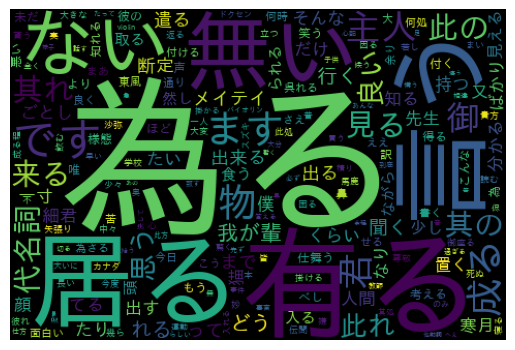

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_fontja import get_font_ttf_path
from fugashi import Tagger

# 『吾輩は猫である』のテキストファイルを読み込む。
with open('neko.txt', encoding='utf_8') as file:
  text = file.read()

# 形態素解析によってテキストを語彙素の列に変換する。
words = []
dicdir = 'unidic-novel'
tagger = Tagger(f'-d {dicdir}')
for word in tagger(text):
  # lemma を抽出する
  lemma = word.feature.lemma

  # lemma が存在しない場合（名詞など）は表層形を用いる
  if lemma is None:
    lemma = word.surface

  words.append(lemma)
text = ' '.join(words)

# ストップワードを用意する
hiragana_list = [chr(code) for code in range(0x3041, 0x3097)]
slothlib_stopwords = open('slothlib_stopwords.txt', encoding='utf_8').read().split()
stopwords = hiragana_list + slothlib_stopwords
#stopwords += 'ない から ある いる 事 する もの です よう その それ そう なる なら この なっ どう まで ます ませ なく じゃ ただ ながら たら そんな くらい だろう って だけ あり ごとく また あの'.split()

# もう一度 word cloud を作成する
wc = WordCloud(
    width=480, height=320,
    font_path=get_font_ttf_path(),
    collocations=False,
    stopwords=stopwords,
)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()